# **04. boxplot(상자그림) 실습**

* 문법 관련 공식 문서 :
    1) 상자그림 : https://seaborn.pydata.org/generated/seaborn.boxplot.html
    2) 벌떼그림 : https://seaborn.pydata.org/generated/seaborn.swarmplot.html
    3) 바이올린 그림 : https://seaborn.pydata.org/generated/seaborn.violinplot.html

## **PART1. 각종 세팅**

In [3]:
# 필요 패키지 호출
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 실습용 데이터가 저장된 폴더
path = r'C:\HANSSAK\SecureGate\Download\DT_Python 시각화'
print('작업 폴더 주소 : ', path)

# 출력 옵션 지정
pd.set_option('display.width', 2000)                  # 한줄에 표시할 컬럼 관련
pd.set_option('display.max_colwidth', None)           # 최대 컬럼너비 (None 지정시 데이터 생략 없음)
pd.options.display.float_format = '{:.2f}'.format     # 표시할 숫자 형식 (지수형태 표현에서 소숫점 2자리까지로)

작업 폴더 주소 :  C:\HANSSAK\SecureGate\Download\DT_Python 시각화


## **PART2. 데이터 로드**

In [16]:
# 데이터 로드 및 정보 / 요약통계량 확인
df = pd.read_csv(path + r'\거시경제지표.csv', encoding = 'cp949')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   조회시점        130 non-null    object 
 1   부실순증금액      130 non-null    float64
 2   선행종합지수      130 non-null    float64
 3   철강생산량       130 non-null    float64
 4   건설수주액       130 non-null    float64
 5   KOSPI지수     130 non-null    float64
 6   VIX지수       130 non-null    float64
 7   CD금리        130 non-null    float64
 8   USD리보금리     130 non-null    float64
 9   장단기금리차(한국)  130 non-null    float64
 10  장단기금리차(미국)  130 non-null    float64
 11  고위험 스프레드    130 non-null    float64
 12  소비자물가지수     130 non-null    float64
 13  근원물가지수      130 non-null    float64
 14  국제유가        130 non-null    float64
 15  경제심리지수      130 non-null    float64
 16  기업경기실사지수    130 non-null    float64
 17  원달러환율       130 non-null    float64
 18  외환보유액       130 non-null    float64
 19  코로나구분       130 non-null    o

,부실순증금액,선행종합지수,철강생산량,건설수주액,KOSPI지수,VIX지수,CD금리,USD리보금리,장단기금리차(한국),장단기금리차(미국),고위험 스프레드,소비자물가지수,근원물가지수,국제유가,경제심리지수,기업경기실사지수,원달러환율,외환보유액
count,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00,130.00
mean,5.51,99.87,18745.19,11726.40,2272.81,17.83,1.90,1.42,0.55,0.85,4.46,99.42,98.50,69.73,95.92,74.08,1157.50,395.36
std,319.14,0.89,1159.30,3187.27,354.92,6.54,0.85,1.55,0.46,0.84,1.06,5.36,4.93,23.56,6.38,6.69,81.07,36.15
min,-715.24,98.00,13965.00,5315.30,1786.75,10.13,0.63,0.12,-0.31,-0.93,3.12,92.71,90.30,20.82,73.60,51.00,1019.36,326.44
25%,-199.24,99.30,18309.00,10346.38,1994.37,13.50,1.40,0.25,0.13,0.24,3.72,94.99,94.86,51.04,94.12,71.00,1105.65,368.75
50%,-21.89,99.80,18997.00,11795.40,2141.59,15.84,1.65,0.72,0.58,0.84,4.21,98.87,98.98,65.51,96.70,74.00,1134.99,399.60
75%,142.07,100.50,19535.00,14132.62,2456.56,20.16,2.65,2.28,0.81,1.42,4.86,101.44,100.67,87.03,99.00,77.75,1187.87,418.79
max,975.39,102.20,20510.00,17798.00,3259.14,57.74,4.02,5.66,1.91,2.56,8.23,113.37,109.51,117.10,106.80,88.00,1426.66,469.21


In [17]:
# 상위 5개 관측치 확인
df.head(5)

,조회시점,부실순증금액,선행종합지수,철강생산량,건설수주액,KOSPI지수,VIX지수,CD금리,USD리보금리,장단기금리차(한국),장단기금리차(미국),고위험 스프레드,소비자물가지수,근원물가지수,국제유가,경제심리지수,기업경기실사지수,원달러환율,외환보유액,코로나구분
0,2013-01-01,337.13,99.50,19449.00,5731.90,1986.10,13.51,2.86,0.30,0.10,1.65,4.92,92.73,90.30,110.46,94.00,69.00,1065.35,328.91,이전
1,2013-02-01,-192.60,99.40,19369.00,5315.30,1979.85,14.07,2.83,0.29,0.08,1.72,4.99,93.04,90.53,107.23,94.30,68.00,1086.68,327.40,이전
2,2013-03-01,-264.74,99.40,16314.00,5487.30,1990.24,13.03,2.81,0.28,-0.05,1.70,4.80,92.95,90.40,106.83,94.70,71.00,1102.20,327.41,이전
3,2013-04-01,33.29,99.40,19027.00,5617.80,1938.88,13.97,2.80,0.27,-0.12,1.53,4.76,92.82,90.34,101.61,95.10,73.00,1121.83,328.80,이전
4,2013-05-01,-619.47,99.40,18757.00,5900.80,1974.45,13.49,2.72,0.28,0.13,1.68,4.38,92.82,90.69,98.57,95.60,73.00,1110.67,328.10,이전


## **PART4. 그래프 생성**

In [18]:
# Seaborn 스타일 설정
sns.set_style('whitegrid')

# 한글폰트 관련 패치
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#### **PART4-1. 상자그림**

<Axes: xlabel='부실순증금액', ylabel='코로나구분'>

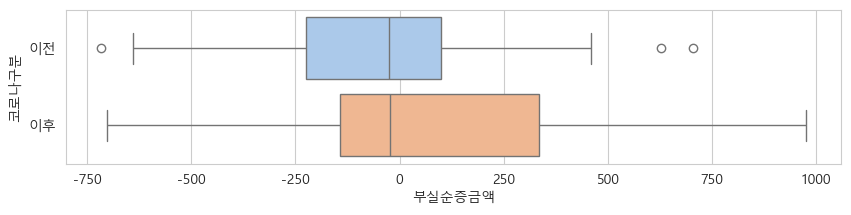

In [24]:
# 도화지 / 좌표계 / 그래프 객체 생성
fig = plt.figure(figsize = [10, 2])
sns.boxplot(data = df, x = '부실순증금액', y = '코로나구분', hue = '코로나구분', palette = 'pastel')

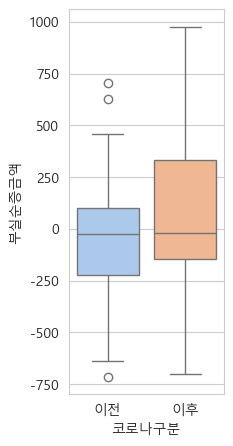

In [30]:
# X축 Y축 반전
fig = plt.figure(figsize = [2, 5])
sns.boxplot(data = df, y = '부실순증금액', x = '코로나구분', hue = '코로나구분', palette = 'pastel');

#### **PART4-2. 벌떼그림**

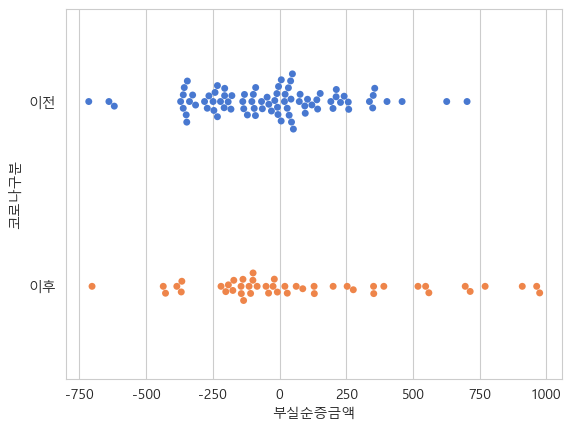

In [31]:
sns.swarmplot(data = df, x = '부실순증금액', y = '코로나구분', hue = '코로나구분', palette = 'muted');

#### **PART4-3. 바이올린 그림**

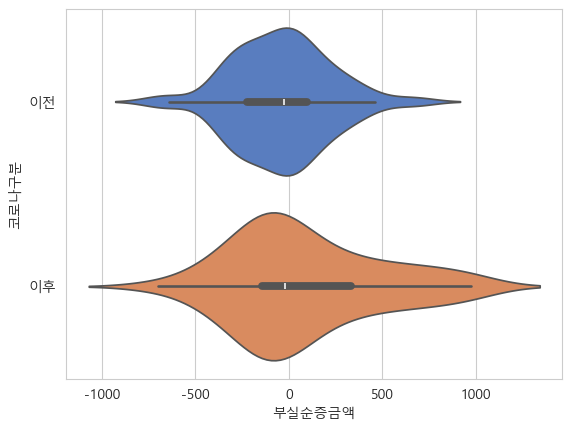

In [32]:
sns.violinplot(data = df, x = '부실순증금액', y = '코로나구분', hue = '코로나구분', palette = 'muted');

#### **PART4-4. 겹쳐그리기**

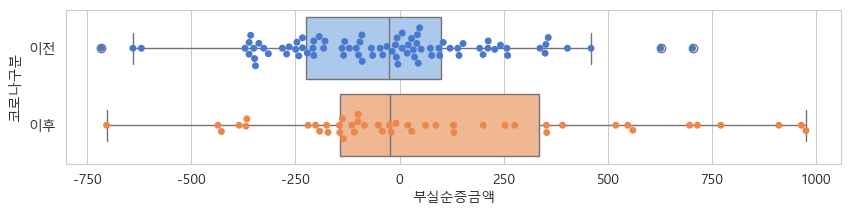

In [33]:
fig = plt.figure(figsize = [10, 2])
sns.boxplot(data = df, x = '부실순증금액', y = '코로나구분', hue = '코로나구분', palette = 'pastel')
sns.swarmplot(data = df, x = '부실순증금액', y = '코로나구분', hue = '코로나구분', palette = 'muted');

###  **👉 boxplot / swarmplot / vilolinplot 모두 문법은 같고, 표현하는 바도 비슷하다 !**

## **PART5. CHALLENGING**🔥 - 여러 수치형 변수에 대해 한꺼번에 boxplot 생성(subplot 활용)

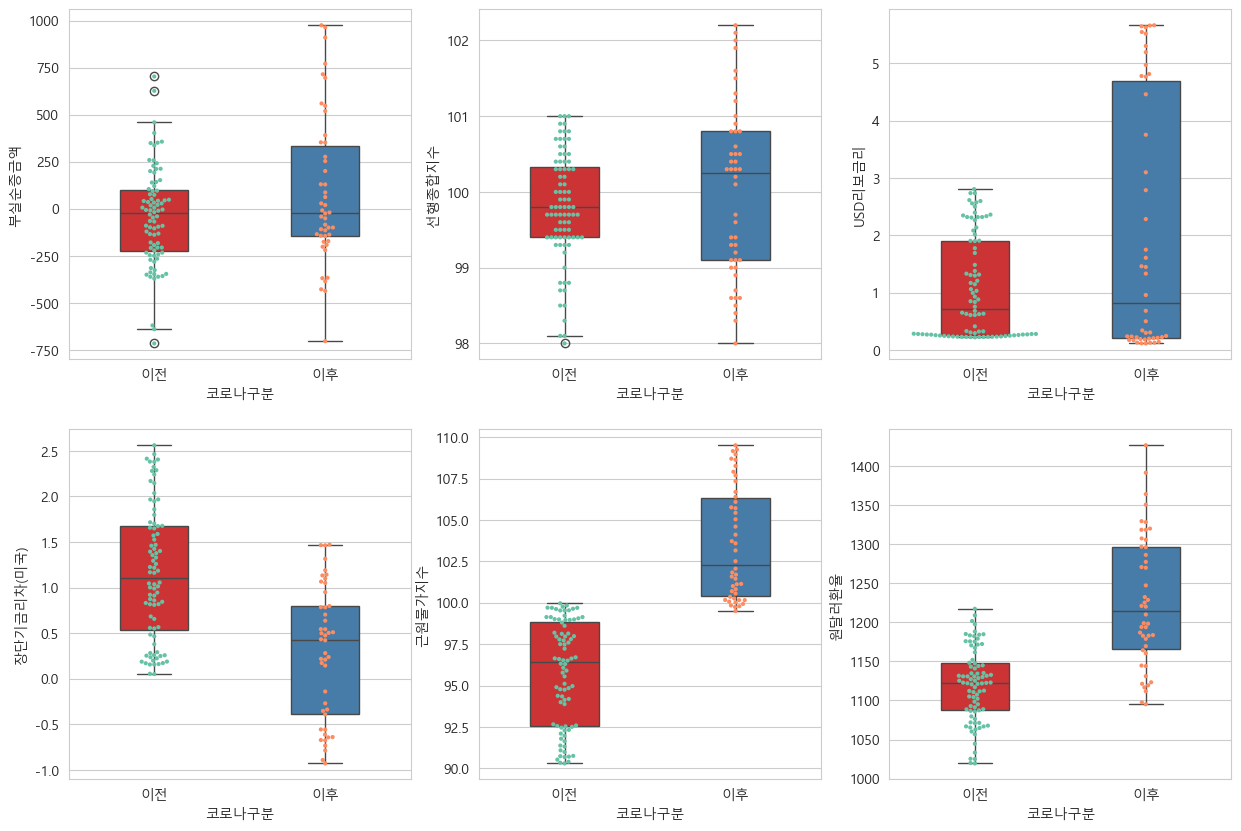

In [47]:
# 조회할 변수 list 생성
vars = ['부실순증금액', '선행종합지수', 'USD리보금리', '장단기금리차(미국)', '근원물가지수', '원달러환율']

# 도화지객체와 subplot 좌표계, 각각의 그래프 객체 생성
fig = plt.figure(figsize = [15, 10])
for i, v in enumerate(vars, start = 231):
    ax = plt.subplot(i)
    plot1 = sns.boxplot(data = df, y = v, x = '코로나구분', hue = '코로나구분', palette = 'Set1', width = 0.4)
    plot2 = sns.swarmplot(data = df, y = v, x = '코로나구분', hue = '코로나구분', size = 3, palette = 'Set2')
    
    if i < 3:
        plt.xlabel('')

### **(참고) enumerate() 함수**

* 순서가 있는 자료형(list, tuple, dictionary, 문자열 등)을 입력으로 받았을 때, 요소별 인덱스와 값을 포함하여 반환함
    * 반환하는 객체 속에는 (인덱스, 값) 순서쌍을 튜플이 요소로 들어있음
* 반환하는 객체의 자료형은 enumerate인데, list() 함수를 사용해 list 자료형으로 변환할 수 있으나, for문과 함께 사용할 경우 자료형 변환은 필요 없음
* 인덱스와 값에 동시에 접근하면서 반복할 필요가 있는 경우에 사용함

In [37]:
# enumerate함수 사용법
help(enumerate)

Help on class enumerate in module builtins:

class enumerate(object)
 |  enumerate(iterable, start=0)
 |  
 |  Return an enumerate object.
 |  
 |    iterable
 |      an object supporting iteration
 |  
 |  The enumerate object yields pairs containing a count (from start, which
 |  defaults to zero) and a value yielded by the iterable argument.
 |  
 |  enumerate is useful for obtaining an indexed list:
 |      (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  __class_getitem__(...) from builtins.type
 |      See PEP 585
 |  
 |  --------------------------------------------------------

In [54]:
#enumerate(list객체) 예시
list(enumerate(['a', 'b', 'c']))

[(0, 'a'), (1, 'b'), (2, 'c')]

In [57]:
## start = 옵션을 지정하면 인덱스의 시작 번호를 바꿀 수 있음 (기본 0)
list(enumerate(['a', 'b', 'c'], start = 230))

[(230, 'a'), (231, 'b'), (232, 'c')]